### Extracting Text from different file sources.
* Image
* PDF
* DOCX

### Extracting Text from Images

### OCR(Optical Character Recognition)

In [3]:
pip install pytesseract opencv-python

  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached pytesseract-0.3.13-py3-none-any.whl (14 kB)
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.0-cp313-cp313-win_amd64.whl.metadata (113 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 1.1 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 2.1 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.2 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 M


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pytesseract  
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# lets load and process the image
image=cv2.imread('Capture1.PNG')

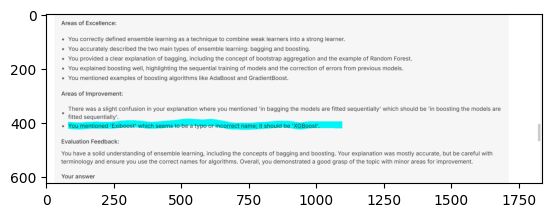

In [8]:
plt.imshow(image)

In [13]:
image1=cv2.imread('notes.jpg')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB) # TO CONVERT BGR TO RGB
image_grey=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY) 
_,image_bw=cv2.threshold(image_grey,120,255,cv2.THRESH_BINARY) # TO CONVERT grey to BLACK AND WHITE


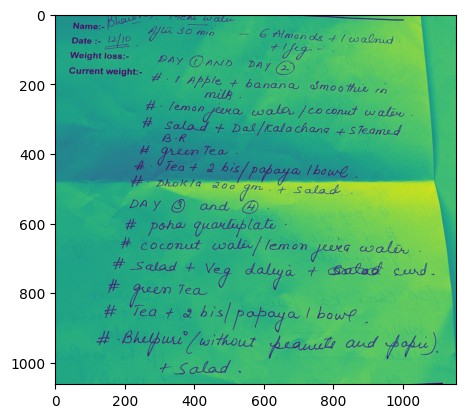

In [14]:
plt.imshow(image_grey)

In [15]:
cv2.imshow('Grey image',image_bw)
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [20]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe" # path where tesseract is installed

In [21]:
print(pytesseract.image_to_string(image_bw))

ee it ONS. IIOR wale
Name:- Pobour- Ata 50 mh

Date :- l2jie

Weight loss:- PAY MAND da Y@
Current weight:- As APhle + banana, Smoohre +f

#- lemon 6 a walt, [coconut wali .
#

— 6 Amon ke tl usable -
tlfeg——

fr” DAO la Congr Salad

DAY © and @ .
lale -

# poha quarlip 1¢ walen -

# coconut walir/ lemon
# Salad 4. veg daliga. + Brokat curd.
#: 7ea.




Note:
* Tesseract is working fine when we have a clear image with typed characters.But as we are giving any image of handwritten notes the text that is extracting is not good enough.
* Lets try another approach and use LLM model as OCR,we will compare the results and see.

In [28]:
import google.generativeai as genai
import os
import cv2
from PIL import Image

In [23]:
key=os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=key)

In [24]:
model=genai.GenerativeModel('gemini-2.5-flash-lite')

In [ ]:
prompt='''You act as an OCR Application on the given image and extract the text from it.give only the text as output without any other description or punctuation.'''

In [26]:
image1=cv2.imread('notes.jpg')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB) # TO CONVERT BGR TO RGB
image_grey=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY) 
_,image_bw=cv2.threshold(image_grey,120,255,cv2.THRESH_BINARY)

In [29]:
#### The image that cv2 gives in the numpy array format,we need to convert it to image object.
final_image=Image.fromarray(image_bw)

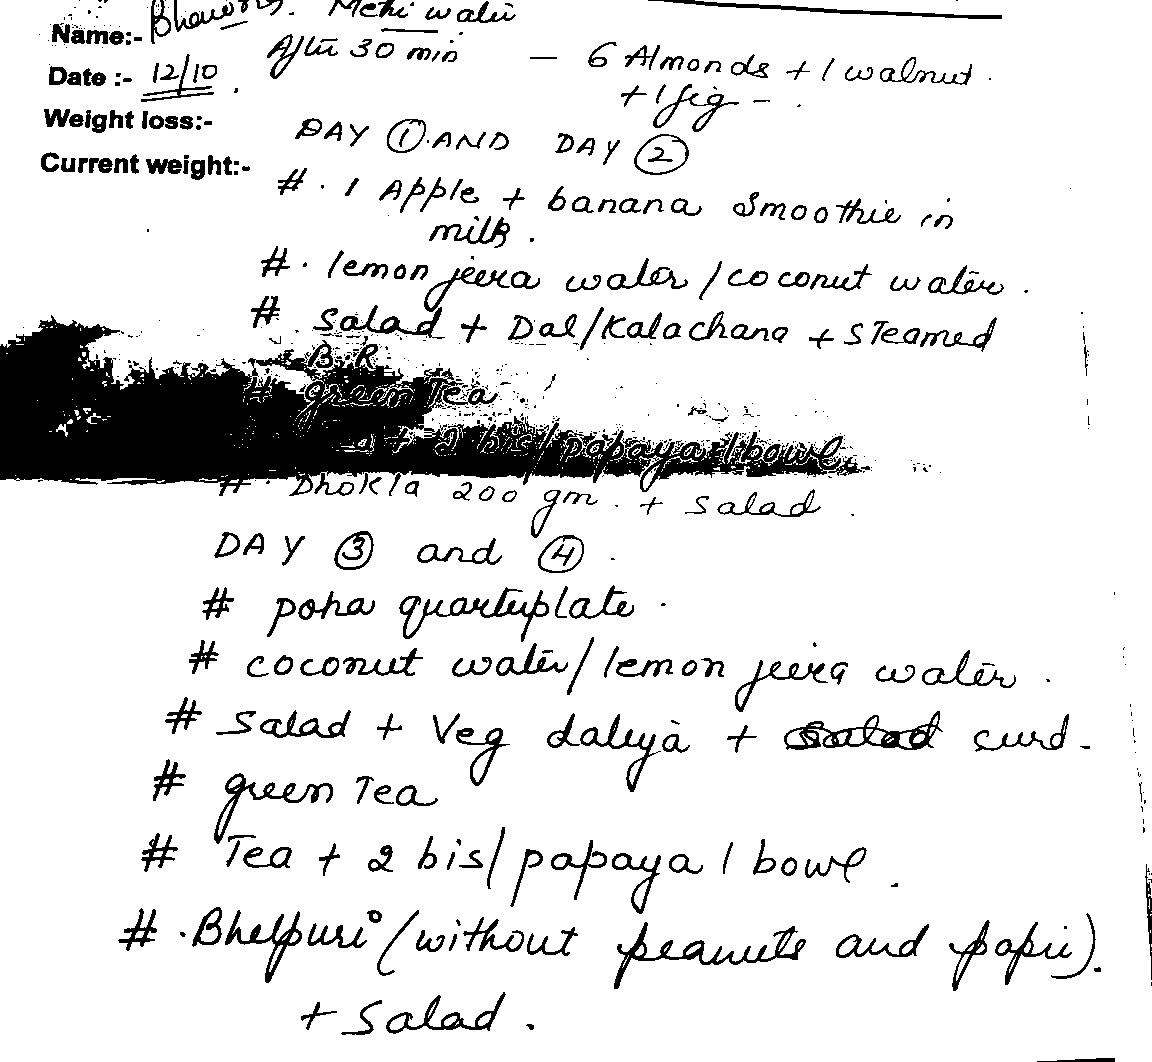

In [30]:
final_image

In [32]:
response=model.generate_content([prompt,final_image])
output_text=response.text
print(output_text)

Bhawana
Name Meh wate
after 30 min - 6 Almonds + 1 walnnt
Date: 12/10 + fig-
Weight loss:- DAY O AND DAY
Current weight:- # 1 Apple + banana smoothie in
milk.
# lemon jeera water / coconut water.
# Salad + Dal/Kalachana + Steamed
B.R
# Green Tea
# 7 bis/ papaya 1 bowl.
# Dhokla 200 gm. + salad
DAY ③ and ④
# poha quartuplate.
# coconut water/ lemon jeera water.
# Salad + Veg dalya + Salad curd.
# green Tea
# Tea + 2 bis/ papaya 1 bowl.
# Bhelpuri (without peanuts and pofii).
+ Salad.


Note::
   
   OCR Based on the LLM model seems to be a better option to extract text even from handwritten notes.
   It may not be able to extract 100% but still its giving better output then tesseract.

### Extract Text from DOCX(word document)

In [34]:
pip install python-docx

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/4.0 MB 658.2 kB/s eta 0:00:06
   ----- ---------------------------------- 0.5/4.0 MB 658.2 kB/s eta 0:00:06
   ------- -------------------------------- 0.8/4.0 MB 774.0 kB/s eta 0:00:05
   ---------- ----------------------------- 1.0/4.0 MB 777.0 kB/s eta 0:00:04
   ---------- ----------------------------- 1.0/4.0 MB 777.0 kB/s eta 0:00:04
   ---------- ----------------------------- 1.0/4.0 MB 777.0 kB/s eta 0:00:04
   ------------- -------------------------- 1.3/4.0 MB 641.1 kB/s eta 0:00:05
   ------------- -------------------------- 1.3/4.0 MB 641.1 kB/s eta 0:00:05
   ------------- -------------------------- 1.3/4.0 MB 641.1 kB/s eta 0:00:05
   ------------- -------------------------- 1.3/4.0 MB 641.1 kB/s eta 0:00:05
   ----------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from docx import Document

In [36]:
# lets read the docx file
file=Document('stats.docx')

In [39]:
text_extacted=''.join([p.text for p in file.paragraphs])

In [40]:
print(text_extacted)

STATISTICS Descriptive Statistics1. What is the difference between population and sample?Population refers to the entire group being studied, while a sample is a subset of the population used for analysis.2. What are mean, median, and mode?Mean: The average of all values.Median: The middle value when arranged in order.Mode: The most frequently occurring value.3. What is the difference between variance and standard deviation?Variance measures how far data points are from the mean, squared.Standard deviation is the square root of variance, making it more interpretable in the same units as the data.4. What are skewness and kurtosis?Skewness: Measures the asymmetry of the data distribution.Positive skew → right tail is longer.Negative skew → left tail is longer.Kurtosis: Measures the "tailedness" of the distribution.High kurtosis → more outliers (leptokurtic).Low kurtosis → fewer outliers (platykurtic).5. What is the difference between a parameter and a statistic?Parameter: A measure that 